<a href="https://colab.research.google.com/github/KirtanaSridharan/TSF-Intership-Tasks/blob/main/TASK_1_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1** : Predicting the score of a student based on the no. of study hours.

#### **AUTHOR: Kirtana Sridharan**


In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## **STEP 1:** Loading the dataset present as a csv file

In [ ]:
# Importing the necessary librarises

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("http://bit.ly/w-data")
data.head(15)  # to view the first 15 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


The following snipet is used to check whether the dataset contains any null values in either of the columns that would disrupt our model prediction.

In [ ]:
data.isnull().sum() 

Hours     0
Scores    0
dtype: int64

## **STEP 2:** Plotting the distribution of scores.

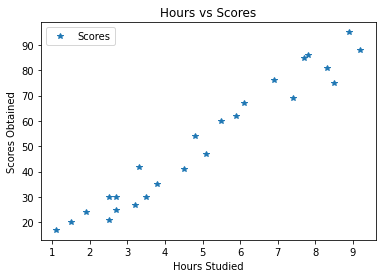

In [ ]:
data.plot('Hours', 'Scores', style='*')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Since this a small dataset, skimming through the data manually will be easy. No pre-processing of the data is required to remove any noisy or unwanted values. 


## **STEP 3:** Preparing the data
The next step is to separate our attribute values and the output values.

In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:,1].values

## **STEP 4:** Splitting the data to test and train data.

In [ ]:
# Dividing our dataset to training and testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [ ]:
print("Training data --> \n\n", X_train, Y_train)
print("\n\nTesting data --> \n\n", X_test, Y_test)

Training data --> 

 [[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


Testing data --> 

 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]] [20 27 69 30 62 35 24 86]


## **STEP 4:** Training the Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

print("Training Complete.")


Training Complete.


Now that the model has been trained effectively, let visualize how well the regression line fits the given data points.

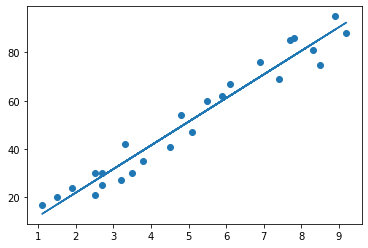

In [ ]:
fit_line = lr.coef_*X + lr.intercept_

plt.scatter(X, Y)
plt.plot(X, fit_line)
plt.show()

In [ ]:
y_pred = lr.predict(X_test)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


Comparing the Actual and Predicted values

In [ ]:
predicted_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
predicted_df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## **STEP 5:** Make Predictions

Predictions are an important task to see if the trained model gives the desired output for the set of inputs that the model was not trained with. 
If the predictions are accurate, we say our model works perfectly and can be used for fututre predictions as well.

In [ ]:
hours = [[float(input())]]
predict_score = lr.predict(hours)
print("Hours : {}".format(*hours))
print(f"Predicted Score: {predict_score[0]}")

9.5
Hours : [9.5]
Predicted Score: 95.3621989064578


## **STEP 6:** Model Evaluation

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651
